Importation des bibliothèques et chargement du dataset

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Chargement du fichier Excel
df = pd.read_excel('data.xlsx')  # assure-toi que le fichier est dans le bon dossier


Aperçu de dataset

In [8]:

print(df.head())
print("\nDimensions du dataset :", df.shape)
print("\nColonnes du dataset :",df.columns)

   ID  Gender  Nationality  Major  Level  IE1  SMSK3  RAS1  RAS2  SMSK1  ...  \
0   1       0            1      0      2    4      3     4     4      2  ...   
1   2       0            0      0      2    4      4     4     4      3  ...   
2   3       0            1      0      1    3      2     3     4      3  ...   
3   4       1            1      1      3    4      4     4     4      4  ...   
4   5       0            0      0      2    4      3     3     4      3  ...   

   IM3  IM4  IM5  IM6   W1   W2   W3  Employed  Score  Class  
0    4    4    4    4  4.0  4.0  4.0       1.0   3.20      1  
1    4    3    4    4  3.0  4.0  3.0       0.0   3.82      1  
2    3    4    4    3  4.0  4.0  2.0       1.0   3.75      1  
3    4    4    4    4  3.0  4.0  4.0       1.0   3.70      1  
4    4    3    3    3  4.0  4.0  2.0       1.0   3.82      0  

[5 rows x 39 columns]

Dimensions du dataset : (260, 39)

Colonnes du dataset : Index(['ID', 'Gender', 'Nationality', 'Major', 'Level', 'IE1

Analyse exploratoire de base


1. Redondances

In [9]:
# Supprimer ID car il n’a pas de rôle dans la classification
df.drop(columns=['ID'], inplace=True, errors='ignore')
print(df.columns)

# Afficher les lignes dupliquées
duplicates = df[df.duplicated()]
print("Lignes dupliquées :")
print(duplicates)


# supprimer les lignes dupliquées
df= df.drop_duplicates()


Index(['Gender', 'Nationality', 'Major', 'Level', 'IE1', 'SMSK3', 'RAS1',
       'RAS2', 'SMSK1', 'SMSK4', 'IE2', 'TL1', 'RAS3', 'IE3', 'RAS4', 'RAS5',
       'IE4', 'SMSK2', 'TL2', 'TL3', 'PSD1', 'PSD2', 'PSD3', 'IE5', 'PSD4',
       'PSD5', 'IM1', 'IM2', 'IM3', 'IM4', 'IM5', 'IM6', 'W1', 'W2', 'W3',
       'Employed', 'Score', 'Class'],
      dtype='object')
Lignes dupliquées :
     Gender  Nationality  Major  Level  IE1  SMSK3  RAS1  RAS2  SMSK1  SMSK4  \
216       0            0      1      3    4      4     4     4      4      4   
217       0            0      1      3    4      4     4     4      4      4   
218       0            0      1      3    3      4     3     3      3      3   
219       0            0      1      3    4      4     4     4      4      4   
220       0            0      1      3    4      4     4     4      2      4   
235       1            0      1      2    4      3     3     4      3      4   
236       1            1      1      2    3      3     3 

--> 14 lignes dupliquées

2. Type des données

In [10]:
# Afficher les colonnes et leur type
print("\nTypes des colonnes :")
print(df.dtypes)
# Affiche les types distincts uniquement
types_uniques = df.dtypes.unique()
print(f"Types de données distincts : {types_uniques}")



Types des colonnes :
Gender           int64
Nationality      int64
Major            int64
Level            int64
IE1              int64
SMSK3            int64
RAS1             int64
RAS2             int64
SMSK1            int64
SMSK4            int64
IE2              int64
TL1              int64
RAS3             int64
IE3              int64
RAS4             int64
RAS5             int64
IE4              int64
SMSK2            int64
TL2              int64
TL3              int64
PSD1             int64
PSD2             int64
PSD3             int64
IE5              int64
PSD4             int64
PSD5             int64
IM1              int64
IM2              int64
IM3              int64
IM4              int64
IM5              int64
IM6              int64
W1             float64
W2             float64
W3             float64
Employed       float64
Score          float64
Class            int64
dtype: object
Types de données distincts : [dtype('int64') dtype('float64')]


 --> Pas de colonnes catégorielles explicites dans le dataset

3. Outliers

In [11]:
for col in df.columns:
    print(f"--- {col} ---")
    print(df[col].unique())
   


--- Gender ---
[0 1]
--- Nationality ---
[1 0]
--- Major ---
[0 1]
--- Level ---
[2 1 3]
--- IE1 ---
[4 3 2 1]
--- SMSK3 ---
[3 4 2 1]
--- RAS1 ---
[4 3 2 1]
--- RAS2 ---
[4 3 2 1]
--- SMSK1 ---
[2 3 4 1]
--- SMSK4 ---
[3 4 2 1]
--- IE2 ---
[3 4 2 1]
--- TL1 ---
[3 4 2 1]
--- RAS3 ---
[4 3 2 1]
--- IE3 ---
[3 4 2 1]
--- RAS4 ---
[3 4 2 1]
--- RAS5 ---
[2 3 4 1]
--- IE4 ---
[4 3 2 1]
--- SMSK2 ---
[3 4 2 1]
--- TL2 ---
[3 4 2 1]
--- TL3 ---
[4 3 2 1]
--- PSD1 ---
[3 4 2 1]
--- PSD2 ---
[3 4 2 1]
--- PSD3 ---
[4 3 2 1]
--- IE5 ---
[3 4 2 1]
--- PSD4 ---
[3 4 2 1]
--- PSD5 ---
[3 4 2 1]
--- IM1 ---
[4 3 2 1]
--- IM2 ---
[4 3 2 1]
--- IM3 ---
[4 3 1 2]
--- IM4 ---
[4 3 2 1]
--- IM5 ---
[4 3 2 1]
--- IM6 ---
[4 3 2 1]
--- W1 ---
[ 4.  3.  2. nan  1.]
--- W2 ---
[ 4.  3.  2. nan  1.]
--- W3 ---
[ 4.  3.  2. nan  1.]
--- Employed ---
[ 1.  0. nan]
--- Score ---
[3.2  3.82 3.75 3.7  3.68 3.83 3.27 3.   3.85 3.89 3.35 3.55 3.25 3.5
 3.67 3.59 3.78 3.23 3.44 3.32 3.45 4.   3.77 3.56 3.49 3.29 3.

outliers de colonne score 

In [12]:
# Extraire la colonne Score
score_col = df['Score']

# Calcul des quartiles
Q1 = score_col.quantile(0.25)
Q3 = score_col.quantile(0.75)
IQR = Q3 - Q1

# Bornes pour détecter les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25%): {Q1}")
print(f"Q3 (75%): {Q3}")
print(f"IQR: {IQR}")
print(f"Borne inférieure: {lower_bound}")
print(f"Borne supérieure: {upper_bound}")

# Identifier les outliers
outliers = df[(df['Score'] < lower_bound) | (df['Score'] > upper_bound)]
print(f"Nombre d'outliers détectés dans 'Score' : {len(outliers)}")

# Supprimer les outliers du DataFrame
df_clean = df[~((df['Score'] < lower_bound) | (df['Score'] > upper_bound))].copy()
print(f"Nombre de lignes après suppression : {len(df_clean)}")

Q1 (25%): 3.405
Q3 (75%): 3.75
IQR: 0.3450000000000002
Borne inférieure: 2.8874999999999993
Borne supérieure: 4.2675
Nombre d'outliers détectés dans 'Score' : 4
Nombre de lignes après suppression : 242


In [13]:
# Vérifier les valeurs manquantes par colonne
valeurs_nulles = df.isnull().sum()

# Filtrer uniquement les colonnes qui ont au moins une valeur manquante
colonnes_avec_nulles = valeurs_nulles[valeurs_nulles > 0]

# Afficher le résultat
print("Colonnes avec des valeurs manquantes :")
print(colonnes_avec_nulles)

Colonnes avec des valeurs manquantes :
W1          19
W2          14
W3          45
Employed     2
dtype: int64


W1, W2, W3 : Scores (échelle 1 à 4)probablement des évaluations 
--> Remplacer par médiane,Moins sensible aux valeurs extrêmes

Employed:	Binaire (0 ou 1)	
--> Remplacer par mode	Très peu de NaN, variable discrèt


In [14]:
# Remplacer W1, W2, W3 par la médiane
df['W1'].fillna(df['W1'].median(), inplace=True)
df['W2'].fillna(df['W2'].median(), inplace=True)
df['W3'].fillna(df['W3'].median(), inplace=True) 

# Remplacer Employed par le mode
df['Employed'].fillna(df['Employed'].mode()[0], inplace=True)

# Vérifier après traitement
print("\nValeurs manquantes après traitement :")
print(df[['W1', 'W2', 'W3', 'Employed']].isnull().sum())


Valeurs manquantes après traitement :
W1          0
W2          0
W3          0
Employed    0
dtype: int64


C:\Users\ghofr\AppData\Local\Temp\ipykernel_23584\81123166.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['W1'].fillna(df['W1'].median(), inplace=True)
C:\Users\ghofr\AppData\Local\Temp\ipykernel_23584\81123166.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [15]:
# Corrélation entre les variables et la classe cible
print(df[['W1', 'W2', 'W3', 'Employed', 'Class']].corr()['Class'])


W1          0.155886
W2          0.360766
W3          0.091837
Employed    0.111538
Class       1.000000
Name: Class, dtype: float64


W3 a :
- Un taux élevé de valeurs manquantes (~18 %)
+ Une corrélation très faible avec Class (0.08)

donc Il est justifié de supprimer W3 du jeu de données sans trop perdre d'information utile.

Supprimer ID car il n’a pas de rôle dans la classification


In [16]:
# Supprimer ID car il n’a pas de rôle dans la classification
df.drop(columns=['W3'], inplace=True, errors='ignore')
print(df.columns)
print("\nDimensions du dataset :", df.shape)


Index(['Gender', 'Nationality', 'Major', 'Level', 'IE1', 'SMSK3', 'RAS1',
       'RAS2', 'SMSK1', 'SMSK4', 'IE2', 'TL1', 'RAS3', 'IE3', 'RAS4', 'RAS5',
       'IE4', 'SMSK2', 'TL2', 'TL3', 'PSD1', 'PSD2', 'PSD3', 'IE5', 'PSD4',
       'PSD5', 'IM1', 'IM2', 'IM3', 'IM4', 'IM5', 'IM6', 'W1', 'W2',
       'Employed', 'Score', 'Class'],
      dtype='object')

Dimensions du dataset : (246, 37)


la distribution des classes

Distribution des classes :
Class
0    128
1    118
Name: count, dtype: int64

Pourcentage par classe :
Class
0    52.03
1    47.97
Name: proportion, dtype: float64


C:\Users\ghofr\AppData\Local\Temp\ipykernel_23584\178382579.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')


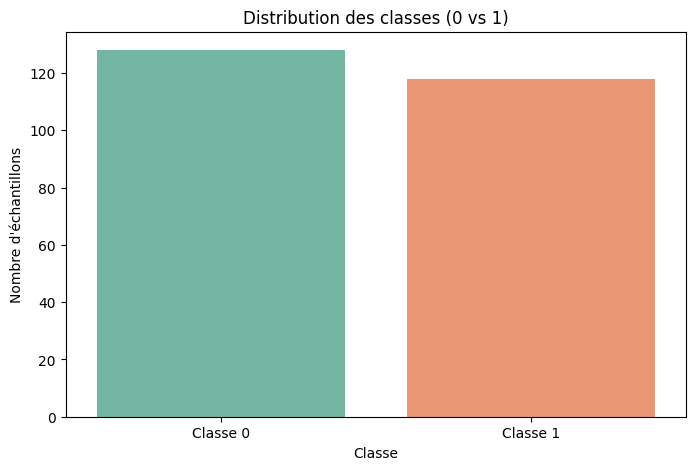

In [17]:
# Vérifier la distribution des classes
class_distribution = df['Class'].value_counts()
print("Distribution des classes :")
print(class_distribution)

# Afficher les pourcentages
class_percentage = df['Class'].value_counts(normalize=True) * 100
print("\nPourcentage par classe :")
print(class_percentage.round(2))

# Visualisation sous forme de graphique à barres
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title("Distribution des classes (0 vs 1)")
plt.xlabel("Classe")
plt.ylabel("Nombre d'échantillons")
plt.xticks([0, 1], ['Classe 0', 'Classe 1'])
plt.show()



-->le dataset est approximativement équilibré  avec une légère majorité pour la classe 0

Slection des colonnes pertinantes
----------------------------------


Corrélation avec Class :
Class          1.000000
IM5            0.662345
IM2            0.631967
IM6            0.631752
IM1            0.565969
IM4            0.562259
PSD4           0.489854
IE3            0.463506
IM3            0.458289
IE5            0.441001
PSD3           0.389568
TL2            0.379572
IE4            0.379088
PSD5           0.370032
SMSK2          0.365342
W2             0.360766
SMSK1          0.352622
IE1            0.342317
SMSK3          0.342079
RAS3           0.336907
PSD2           0.333160
TL1            0.309792
RAS4           0.307397
RAS1           0.293767
PSD1           0.291010
SMSK4          0.290698
TL3            0.289496
IE2            0.234836
RAS5           0.212977
RAS2           0.200330
W1             0.155886
Employed       0.111538
Nationality    0.079912
Score          0.068210
Gender         0.057801
Major         -0.127969
Level         -0.193994
Name: Class, dtype: float64


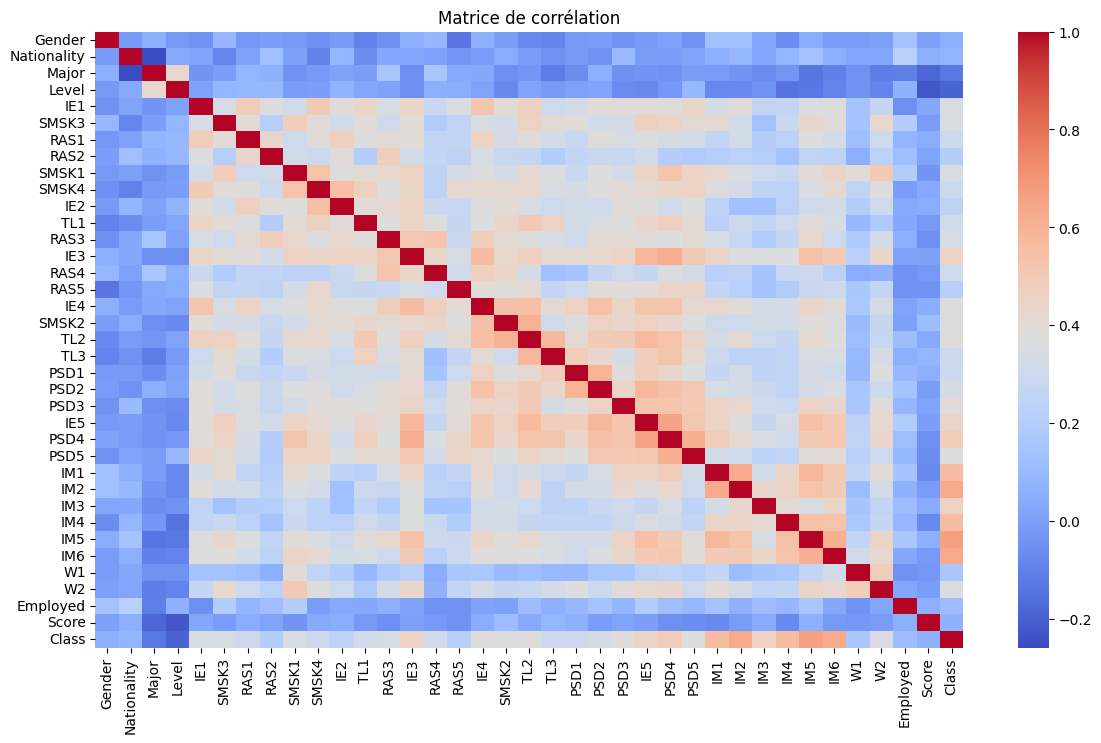

In [18]:

# Calculer la corrélation avec Class
correlation_with_class = df.corr()['Class'].sort_values(ascending=False)
print("\nCorrélation avec Class :")
print(correlation_with_class)

# Visualiser sous forme de heatmap (facultatif)
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Matrice de corrélation")
plt.show()

Les colonnes très corrélées avec Class incluent :
IM5, IM2, PSD4, IE3, RAS3, TL1, W2,...
Ces colonnes sont les plus influentes pour prédire la classe .

['Major', 'Level']   Faiblement négatives, mais peuvent avoir un sens métier

In [19]:
# Filtrer les colonnes corrélées avec Class (> 0.3)
threshold = 0.3
important_columns = correlation_with_class[abs(correlation_with_class) > threshold].index.tolist()

# Supprimer 'Class' de cette liste si elle y est
if 'Class' in important_columns:
    important_columns.remove('Class')

# Ajouter 'major' et 'level' à la liste des colonnes importantes
important_columns.extend(['Major', 'Level'])

# Afficher les colonnes sélectionnées
print("\nColonnes sélectionnées pour le modèle :")
print(important_columns)




Colonnes sélectionnées pour le modèle :
['IM5', 'IM2', 'IM6', 'IM1', 'IM4', 'PSD4', 'IE3', 'IM3', 'IE5', 'PSD3', 'TL2', 'IE4', 'PSD5', 'SMSK2', 'W2', 'SMSK1', 'IE1', 'SMSK3', 'RAS3', 'PSD2', 'TL1', 'RAS4', 'Major', 'Level']


In [20]:

# Créer le nouveau DataFrame
X = df[important_columns]
y = df['Class']



# Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:

# Définir les modèles
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(penalty='l2', solver='liblinear', random_state=42),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)  
}

# Normalisation (important pour SVM, KNN et MLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner et évaluer chaque modèle
results = {}

for name, model in models.items():
    print(f"\nEntraînement du modèle : {name}")

    # Pas besoin de normaliser pour Random Forest, Logistic Regression et XGBoost
    if name in ["Random Forest", "Logistic Regression", "XGBoost"]:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    f1 = f1_score(y_test, y_pred, average='macro')
    results[name] = f1
    print(f"{name} - F1 Score (Macro): {f1:.4f}")



Entraînement du modèle : Random Forest
Random Forest - F1 Score (Macro): 0.9600

Entraînement du modèle : SVM
SVM - F1 Score (Macro): 0.9400

Entraînement du modèle : KNN
KNN - F1 Score (Macro): 0.8595

Entraînement du modèle : Logistic Regression
Logistic Regression - F1 Score (Macro): 0.9000

Entraînement du modèle : Neural Network (MLP)
Neural Network (MLP) - F1 Score (Macro): 0.9199

Entraînement du modèle : XGBoost
XGBoost - F1 Score (Macro): 0.9199


C:\Users\ghofr\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [16:31:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


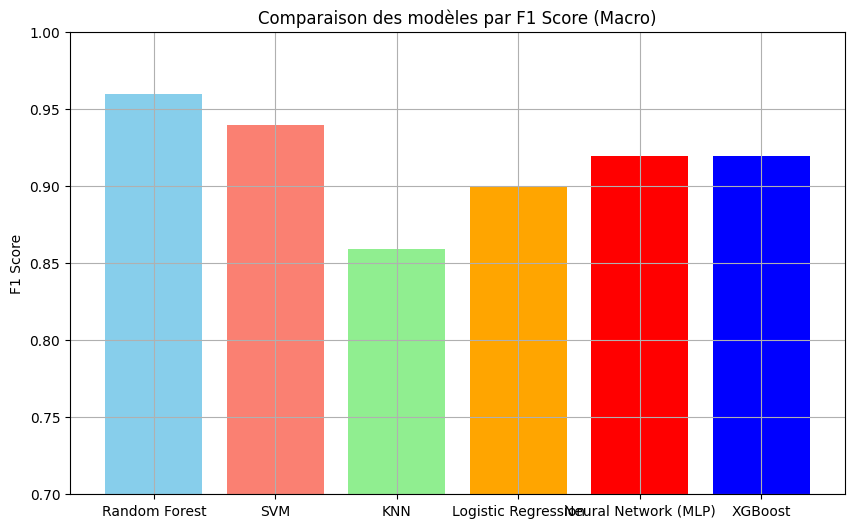

In [23]:

# Afficher les scores F1 obtenus
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['skyblue', 'salmon', 'lightgreen', 'orange','red','blue'])
plt.title("Comparaison des modèles par F1 Score (Macro)")
plt.ylabel("F1 Score")
plt.ylim(0.7, 1.0)
plt.grid(True)
plt.show()

Random Forest (0.9600) :

Meilleure performance globale.

Excellente capacité à capturer les relations complexes et non linéaires.

Robuste face au surapprentissage, surtout avec un petit dataset (240 lignes).

Peu sensible à la mise à l’échelle des données.